In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
%matplotlib inline
from config import ROOT_DIR, SQL_USER, SQL_PWD, SQL_SERVER, SQL_DRIVER, SQL_DB 
from sql_con import SQLConnection, read_contents
import csv

#### Read from car_prices dataset and correct/transform malformed pattern before reading to final dataframe
#### Run info and describe dataframe methods to get a quick understanding of the data

In [32]:
raw_df = pd.read_csv(rf"{ROOT_DIR}/data/car_prices.csv", delimiter="\t")

In [33]:
raw_df

,"year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate"
0,"2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg5..."
1,"2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg5..."
2,"2014,BMW,3 Series,328i SULEV,Sedan,automatic,w..."
3,"2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f13..."
4,"2014,BMW,6 Series Gran Coupe,650i,Sedan,automa..."
...,...
558832,"2015,Kia,K900,Luxury,Sedan,,knalw4d4xf6019304,..."
558833,"2012,Ram,2500,Power Wagon,Crew Cab,automatic,3..."
558834,"2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58c..."
558835,"2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al..."


In [34]:
# clean up the data malformation in given csv file
to_replace = "SE PZEV w/Connectivity, Navitgation" # csv malformation
value = "SE"
raw_df.replace(to_replace=to_replace, value=value, regex=True, inplace=True)

In [35]:
raw_df.to_csv(rf"{ROOT_DIR}/data/car_sales_cleaned.csv", quoting=csv.QUOTE_NONE, sep="\t", index=False)

In [36]:
df = pd.read_csv(rf"{ROOT_DIR}/data/car_sales_cleaned.csv", delimiter=",")

In [37]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [38]:
# parse saledate column to datetime along with timezone
df["saledate"].str.split("GMT", expand=True)[0]
df["saledate"] = pd.to_datetime(df["saledate"].str.split("GMT", expand=True)[0]).dt.tz_localize("US/Pacific")

In [39]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,2014-12-16 12:30:00-08:00
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,2014-12-16 12:30:00-08:00
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,2015-01-15 04:30:00-08:00
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,2015-01-29 04:30:00-08:00
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,2014-12-18 12:30:00-08:00


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype                     
---  ------        --------------   -----                     
 0   year          558837 non-null  int64                     
 1   make          548536 non-null  object                    
 2   model         548438 non-null  object                    
 3   trim          548186 non-null  object                    
 4   body          545642 non-null  object                    
 5   transmission  493480 non-null  object                    
 6   vin           558837 non-null  object                    
 7   state         558837 non-null  object                    
 8   condition     547043 non-null  float64                   
 9   odometer      558743 non-null  float64                   
 10  color         558088 non-null  object                    
 11  interior      558088 non-null  object                    
 12  se

In [10]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547043.000000,558743.000000,558837.000000,558837.000000
mean,2010.038927,3.424511,68320.437548,13769.319811,13611.207538
std,3.966864,0.949462,53398.058707,9679.649690,9749.444610
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28371.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52254.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99109.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


## Numeric Variable Relationships
#### Use a pairplot to get a good sense for the relationships between the numeric variables in the dataset

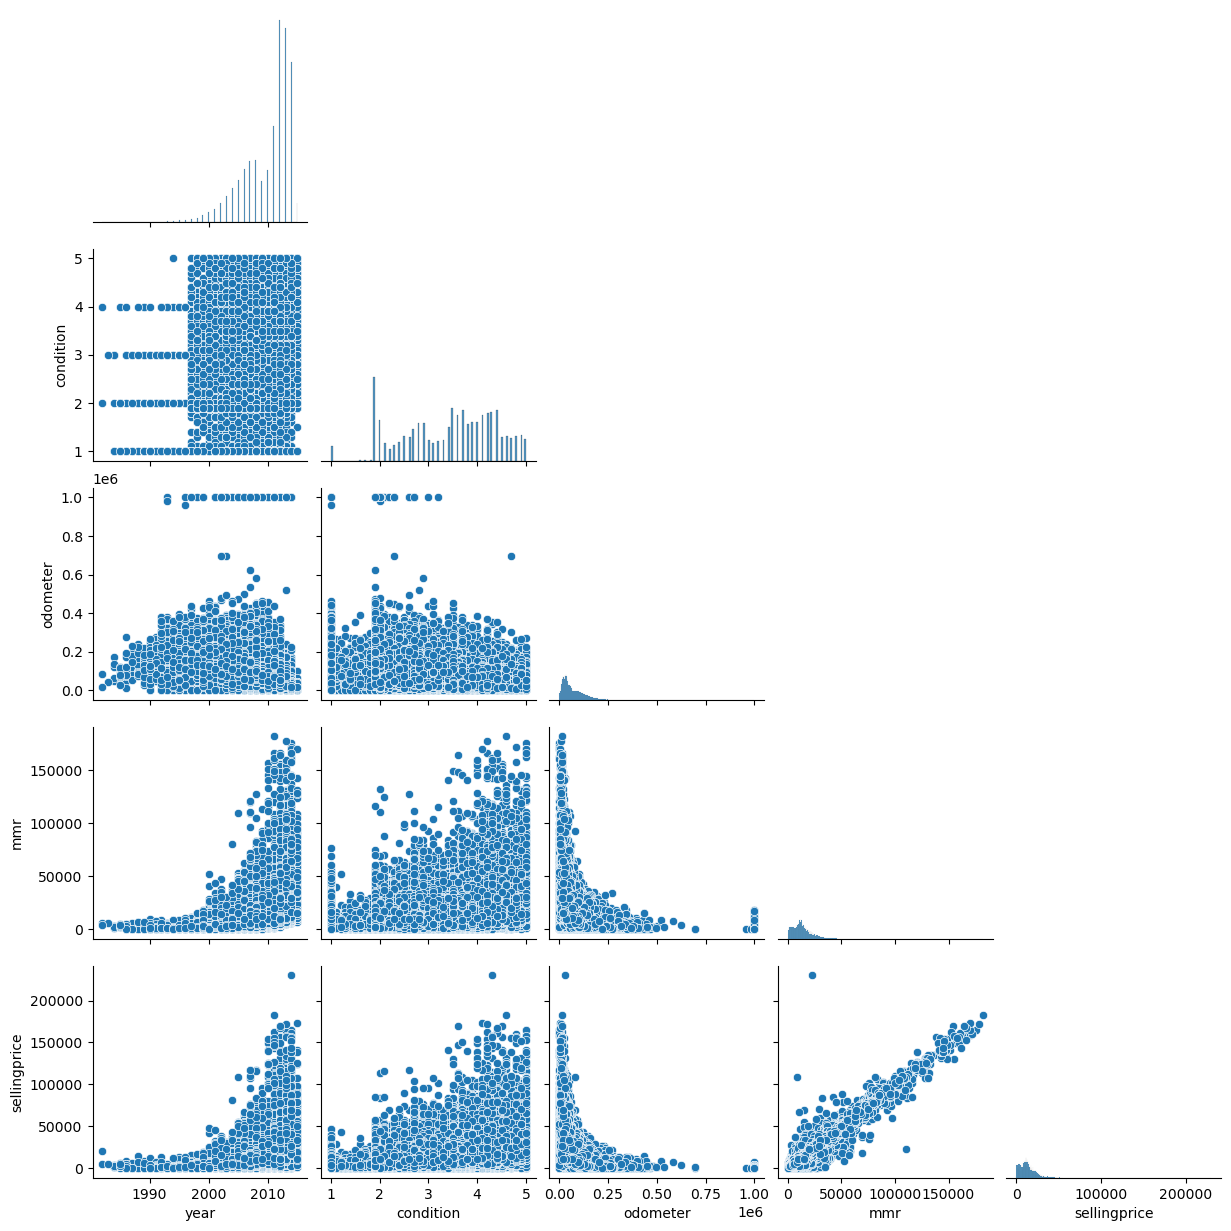

In [11]:
# Turn upper corner of the pairplot matrix off to avoid redundancy
sns.pairplot(df, corner=True)

#### Use pairplot on filtered data for following body types 
- SUV
- Sedan
- Convertible
- Coupe

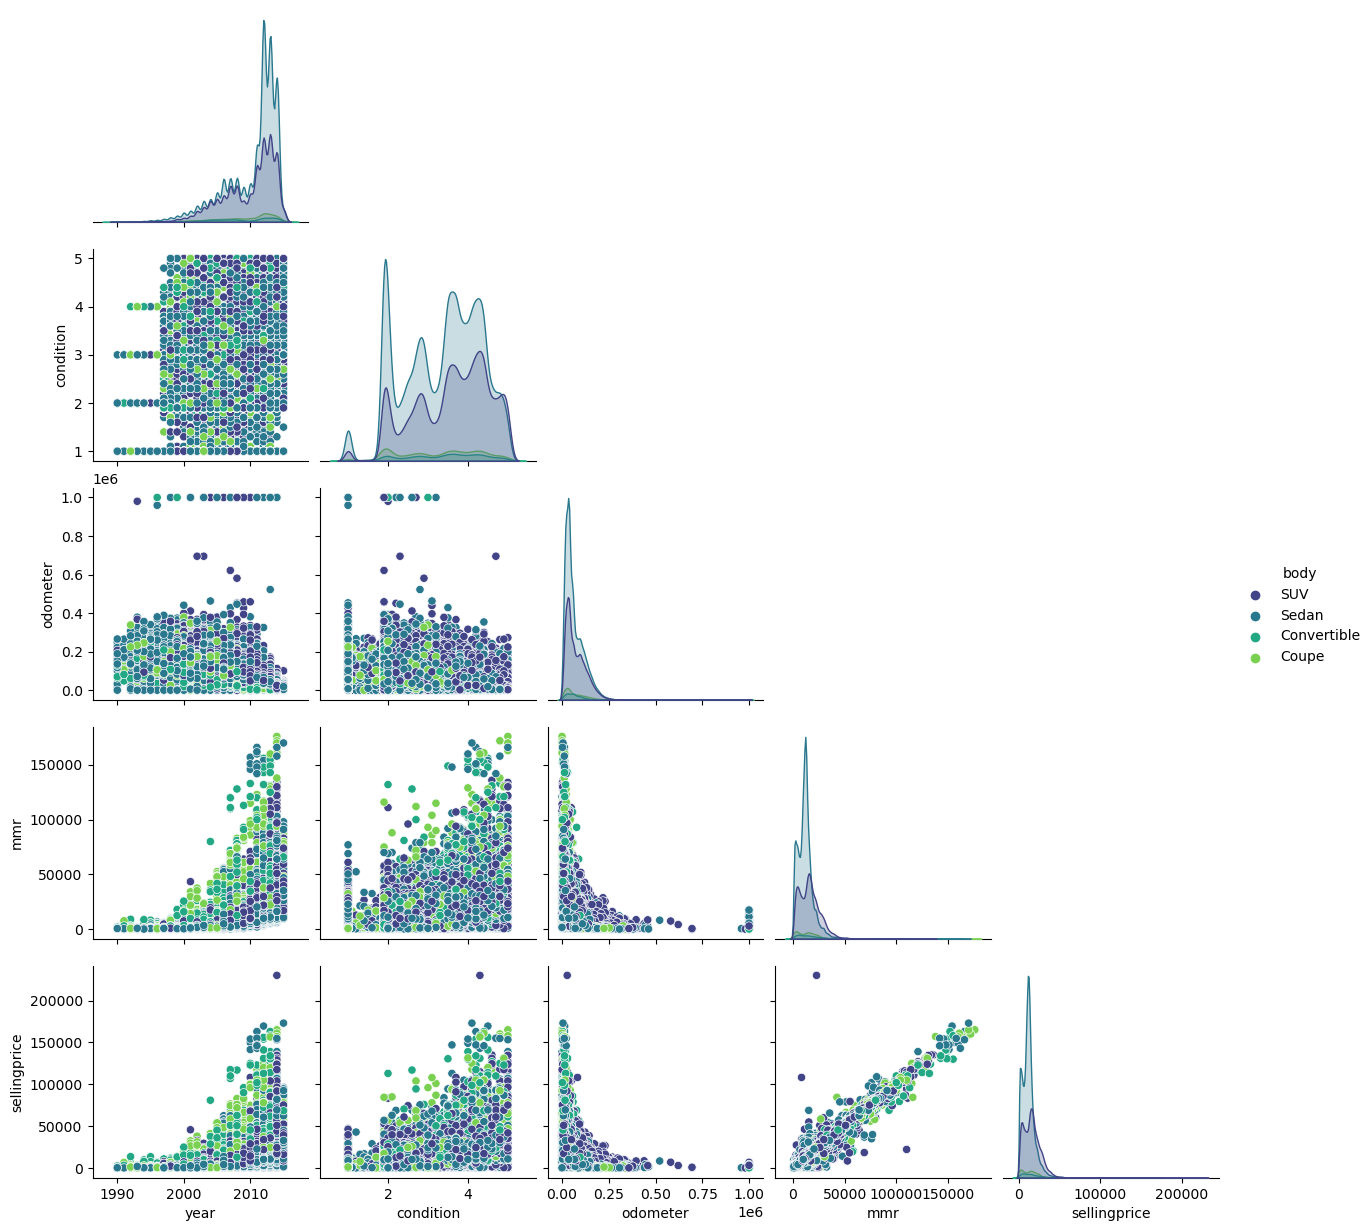

In [12]:
# Turn upper corner of the pairplot matrix off to avoid redundancy
# use hue parameter to map different colors to body types
body_types = ["SUV", "Sedan", "Convertible", "Coupe"]
sns.pairplot(
    df.query("body in @body_types"),
    corner=True,
    hue='body',
    palette="viridis"
)
# using hue parameter shows smooth kernel density estimation (KDE) curves instead of discrete histogram distributions

#### Correlation Heat Map
- Plot a heatmap of the correlation between the numeric variables. 
- Does it make sense year and condition/odometer are negatively correlated?

In [13]:
# extract age of car in days in new column
df["car_age (days)"] = (pd.to_datetime("now", utc=True) - pd.to_datetime(df["year"], format="%Y").dt.tz_localize("UTC")).dt.days
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,car_age (days)
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2984
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2984
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),3349
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),2984
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),3349


In [14]:
# capture correlation matrix in dataframe
df_corr = df.loc[:, ["car_age (days)", "condition", "odometer", "mmr", "sellingprice"]].corr()
df_corr

,car_age (days),condition,odometer,mmr,sellingprice
car_age (days),1.000000,-0.551232,0.772731,-0.596596,-0.586454
condition,-0.551232,1.000000,-0.538826,0.485026,0.538774
odometer,0.772731,-0.538826,1.000000,-0.588090,-0.582380
mmr,-0.596596,0.485026,-0.588090,1.000000,0.983632
sellingprice,-0.586454,0.538774,-0.582380,0.983632,1.000000


<AxesSubplot: >

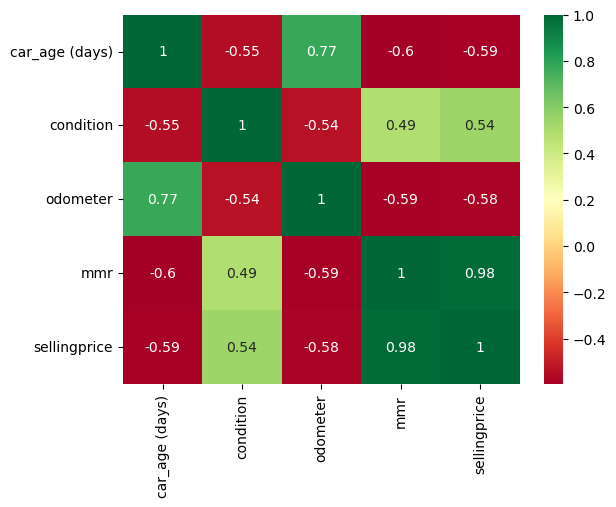

In [15]:
sns.heatmap(
    df_corr,
    cmap="RdYlGn",
    annot=True
)

#### Value Retention
- Filter your data down to the following values of make (brand): 
    - Ford
    - BMW
    - Toyota
    - Chevy
- Build a linear relationship plot comparing odometer (distance car has travelled) vs sellingprice, broken by make
- If you want to fit a regression line with scipy.stats, use dropna() on dataframe first

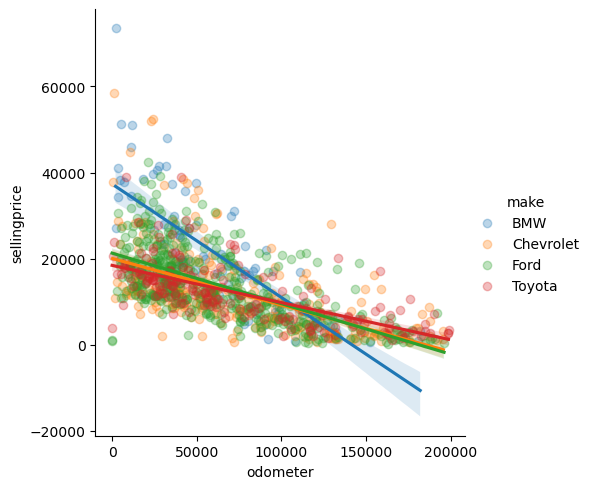

In [21]:
brand_list = ["Ford", "BMW", "Toyota", "Chevrolet"]
sns.lmplot(
    x="odometer",
    y="sellingprice",
    data=df.query("make in @brand_list and sellingprice < 150000 and odometer < 200000").sample(1000),
    hue="make",
    scatter_kws={"alpha": 0.3}
)

In [25]:
from scipy.stats import linregress

# get metrics for linear regression (for all makes) for above relationship
df_regress = df.dropna()
linregress(x=df_regress["odometer"], y=df_regress["sellingprice"])

LinregressResult(slope=-0.10685542121912882, intercept=20817.42477491993, rvalue=-0.5773593995519897, pvalue=0.0, stderr=0.0002198702844463866, intercept_stderr=18.5870105948452)

In [26]:
# get metrics for linear regression (for makes in brand list) for above relationship
for brand in brand_list:
    df_regress = df.query("make == @brand").dropna()
    print(f"Linear regression for {brand}")
    print(linregress(x=df_regress["odometer"], y=df_regress["sellingprice"]))
    print()

Linear regression for Ford
LinregressResult(slope=-0.09953734771818888, intercept=20840.011075886523, rvalue=-0.5766856281088094, pvalue=0.0, stderr=0.0004954231772393875, intercept_stderr=38.55451158159915)

Linear regression for BMW
LinregressResult(slope=-0.2225033042967634, intercept=35567.9797446848, rvalue=-0.7465574337202435, pvalue=0.0, stderr=0.0014986443795278743, intercept_stderr=120.73425197603864)

Linear regression for Toyota
LinregressResult(slope=-0.07594777614361674, intercept=17813.017107685304, rvalue=-0.6332091990580268, pvalue=0.0, stderr=0.0004940182170495778, intercept_stderr=44.79937606527679)

Linear regression for Chevrolet
LinregressResult(slope=-0.08841045962774961, intercept=18705.587357485063, rvalue=-0.5460888174611522, pvalue=0.0, stderr=0.0005828433094248876, intercept_stderr=55.07879089776883)



#### Categorical Variable Relationships
- Bin the condition variable into increments of 0.5
- Build a bar plot of average sellling price by condition bin

In [48]:
# create categories for condition as new column
# get average selling price for each condition bin
labels = ["1-1.5", "1.5, 2", "2-2.5", "2.5-3", "3-3.5", "3.5-4", "4-4.5", "4.5-5"]
df["condition_bins"] = pd.cut(df["condition"], bins=8, labels=labels)
df.loc[:, ["condition_bins", "sellingprice"]].groupby("condition_bins").mean()

,sellingprice
condition_bins,
1-1.5,3916.113036
"1.5, 2",5272.912709
2-2.5,8131.216452
2.5-3,10350.570446
3-3.5,12637.256656
3.5-4,15534.957436
4-4.5,18493.709994
4.5-5,22121.181117


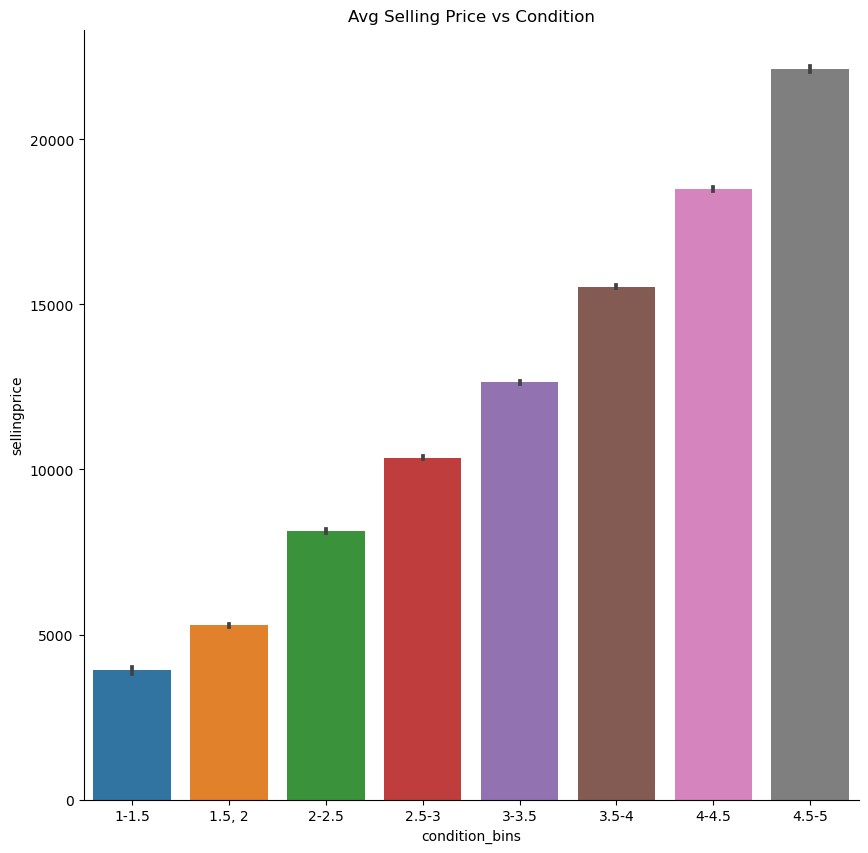

In [49]:
# plot average selling price vs condition graphically
fig, ax = plt.subplots(figsize=(10, 10))

sns.barplot(
    x="condition_bins",
    y="sellingprice",
    data=df
)

ax.set_title("Avg Selling Price vs Condition")
sns.despine()

In [52]:
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,car_age (days),condition_bins
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2984,4.5-5
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2984,4.5-5
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),3349,4-4.5
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),2984,4-4.5
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),3349,4-4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT),2984,4-4.5
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),4080,4.5-5
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),4080,4.5-5
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT),2984,3.5-4
